In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

from sklearn.svm import SVC

In [2]:
plt.rcParams["font.family"] = 'DejaVu Sans'

plt.rcParams['text.latex.unicode'] = True

plt.rcParams['text.usetex'] = True

plt.rcParams['text.latex.preamble'] = [r'\usepackage[utf8x]{inputenc}', 
                                       r'\usepackage[english,russian]{babel}', 
                                       r'\usepackage{amsmath}']

In [3]:
l = 400
n = 2

np.random.seed(0)
y = np.random.randint(0, 5, l)

k=1
X1 = np.array([-0.5, -0.5]) + 0.2*np.random.randn(l, n)
X1[y==k] = np.array([0.5, 0.5]) + 0.2*np.random.randn(l, n)[y==k]
y1 = np.zeros_like(y)
y1[y==k] = 1

k=2
X2 = np.array([0.5, -0.5]) + 0.2*np.random.randn(l, n)
X2[y==k] = np.array([-0.5, 0.5]) + 0.2*np.random.randn(l, n)[y==k]
y2 = np.zeros_like(y)
y2[y==k] = 1

k=3
X3 = np.array([0., -1]) + 0.35*np.random.randn(l, n)
X3[y==k] = np.array([0., 1]) + 0.35*np.random.randn(l, n)[y==k]
y3 = np.zeros_like(y)
y3[y==k] = 1

k=4
X4 = np.array([-1, 0.]) + 0.35*np.random.randn(l, n)
X4[y==k] = np.array([1, 0.]) + 0.35*np.random.randn(l, n)[y==k]
y4 = np.zeros_like(y)
y4[y==k] = 1

In [4]:
X_all = np.hstack([X1, X2, X3, X4])
y_all = np.array(y > 0, dtype=np.int)

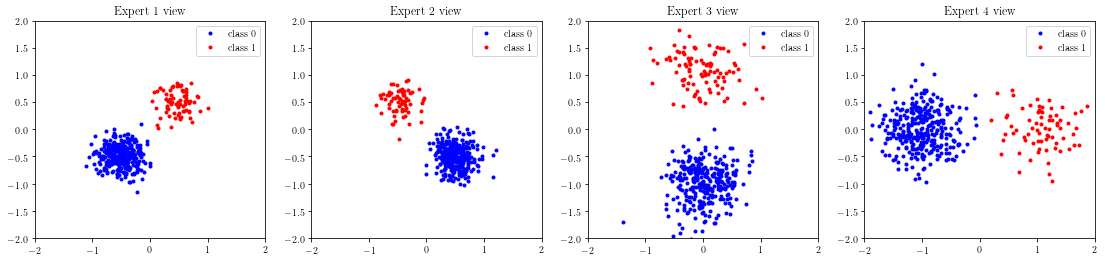

In [5]:
colors = ['blue', 'red']
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i in range(4):
    ax.append(fig.add_subplot(gs[i]))
    ax[i].set_xlim((-2, 2))
    ax[i].set_ylim((-2, 2))
    ax[i].set_title('Expert {} view'.format(i+1))

for k in np.unique(y1):
    ax[0].plot(X1[y1==k, 0], X1[y1==k, 1], '.', color=colors[k], label='class {}'.format(k))

for k in np.unique(y2):
    ax[1].plot(X2[y2==k, 0], X2[y2==k, 1], '.', color=colors[k], label='class {}'.format(k))
    
for k in np.unique(y3):
    ax[2].plot(X3[y3==k, 0], X3[y3==k, 1], '.', color=colors[k], label='class {}'.format(k))
    
for k in np.unique(y4):
    ax[3].plot(X4[y4==k, 0], X4[y4==k, 1], '.', color=colors[k], label='class {}'.format(k))
    
for i in range(4):
    ax[i].legend(loc='best')
    
plt.savefig('./figures/expert_example.pdf', bbox_inches='tight')
plt.show()

In [6]:
model = SVC(kernel='linear')
_ = model.fit(X_all, y_all)
model.score(X_all, y_all)

0.9475

In [7]:
model = SVC(kernel='linear')
_ = model.fit(X1, y1)
model.score(X1, y1)

1.0

In [8]:
model = SVC(kernel='linear')
_ = model.fit(X2, y2)
model.score(X2, y2)

1.0

In [9]:
model = SVC(kernel='linear')
_ = model.fit(X3, y3)
model.score(X3, y3)

1.0

In [10]:
model = SVC(kernel='linear')
_ = model.fit(X4, y4)
model.score(X4, y4)

1.0